In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
import pickle

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/card_transdata.csv'
df = pd.read_csv(file_path)
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=36b850325751531e713853a58ce43c773586c759b55d9ab0550b6b3dc5639923
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
fig = px.histogram(df,x="online_order" , y="fraud" ,  color_discrete_sequence=['red'], nbins=10, height=400)
fig.update_layout(
    title_text="Distribution of fraud by online_order",
    xaxis_title="online_order",
    yaxis_title="fraud"
)
fig.show()

In [ ]:
fig = px.histogram(df,x="distance_from_last_transaction" , y="fraud" ,  color_discrete_sequence=['red'], nbins=10, height=400)
fig.update_layout(
    title_text="Distribution of fraud by distance_from_last_transaction",
    xaxis_title="distance_from_last_transaction",
    yaxis_title="fraud"
)
fig.show()

In [ ]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [ ]:
df = df.drop(columns='distance_from_last_transaction')

In [ ]:
df = df.drop(columns='repeat_retailer')

In [ ]:
df.columns

Index(['distance_from_home', 'ratio_to_median_purchase_price', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [ ]:
feature_cols =['distance_from_home', 'ratio_to_median_purchase_price', 'used_chip','used_pin_number', 'online_order']
X = df[feature_cols]
y = df['fraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy_dt=accuracy

In [ ]:
print("Accuracy:", accuracy*100)
print("Classification Report:\n", report)

Accuracy: 98.804
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    273871
         1.0       0.93      0.93      0.93     26129

    accuracy                           0.99    300000
   macro avg       0.96      0.96      0.96    300000
weighted avg       0.99      0.99      0.99    300000



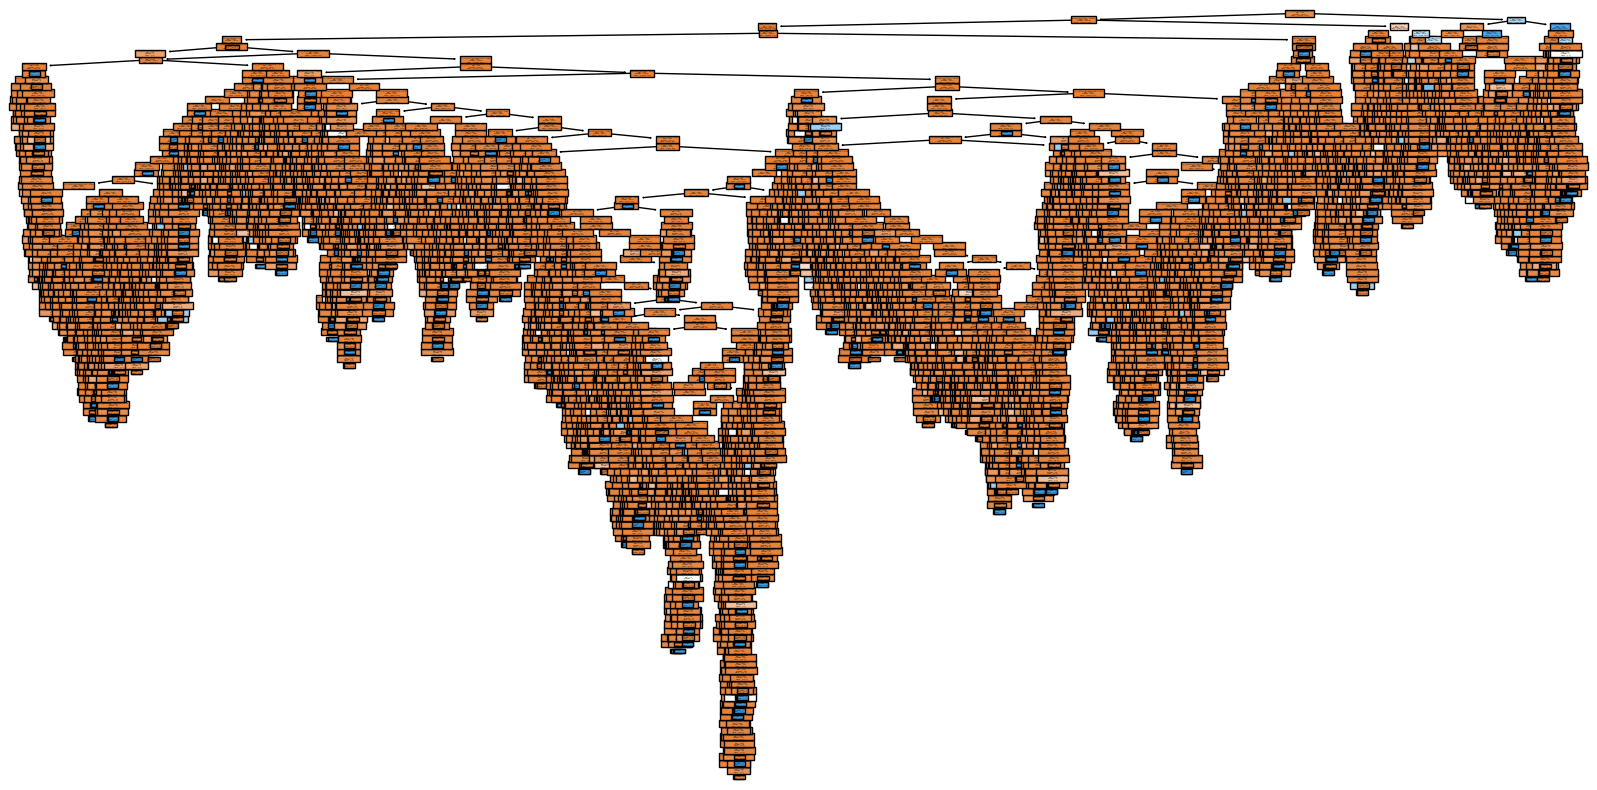

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
rf_initial_accuracy = rf_clf.score(X_test, y_test)
rf_initial_accuracy=rf_initial_accuracy*100
print(f"Initial Random Forest Accuracy: {rf_initial_accuracy:.2f}")

In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

In [ ]:
y_predict= lg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
accuracy=accuracy*100
print(f'Accuracy: {accuracy:.2f}')
accuracy_log_reg=accuracy

In [ ]:
y_prob = lg.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_prob = rf_clf.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_prob = dt.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier')
plt.legend(loc='lower right')
plt.show()

In [ ]:
def compare_algorithms_accuracy(df, feature_cols, test_size=0.2, random_state=42):
    allAcc = {'Logistic Regression Accuracy': accuracy_log_reg,'Random Forest Classifier Accuracy': rf_initial_accuracy,'Decision Tree Accuracy': accuracy_dt}
    highest_accuracy = max(allAcc, key=allAcc.get)
    return f"The algorithm with the highest accuracy is: {highest_accuracy} with an accuracy of {allAcc[highest_accuracy]*100:.2f}%"
result = compare_algorithms_accuracy(df, feature_cols)
print(result)

In [ ]:
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

In [ ]:
with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

In [ ]:
loaded_rf_model.predict(X_test)

In [ ]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
def main():
    print("Credit Card Fraud Detection")
    distance_from_home = int(input("distance_from_home: "))
    ratio_to_median_purchase_price = int(input("ratio_to_median_purchase_price: "))
    used_chip = int(input("used_chip: "))
    used_pin_number = int(input("used_pin_number: "))
    online_order = int(input("online_order: "))
    fraud = int(input("fraud: "))
    #Predict
    prediction = classifier.predict([[distance_from_home, ratio_to_median_purchase_price, used_chip, used_pin_number, online_order, fraud]])

    if prediction[0] == 0:
        print("not fraud.")
    else:
        print("Likely fraud.")

In [ ]:
if __name__ == '__main__':
    main()